In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
list_values= []
train=pd.read_csv('train.csv')
X_train=train.iloc[:,:-2].values
Y_train=train.iloc[:,-1].values
print(Y_train.reshape(-1,1).shape)

(7352, 1)


In [3]:
test=pd.read_csv('test.csv')
X_test=test.iloc[:,:-2].values
Y_test=test.iloc[:,-1].values

### Initialising the classifiers used in the prediction

In [4]:
models={}
clf1 = RandomForestClassifier(n_estimators=1000)
models['Random Forest']=clf1
clf2=KNeighborsClassifier(n_neighbors=6)
models['KNN']=clf2
clf3=DecisionTreeClassifier()
models['Decision Tree']=clf3
clf4=LogisticRegression(max_iter=10000)
models['Logistic Regg']=clf4
clf5=SVC(gamma='auto',kernel='rbf',C=1)
models['SVM']=clf5
clf6=GaussianNB()
models['Naive Bayes']=clf6
clf7=ExtraTreesClassifier()
models['Extra Trees']=clf7
clf8=BaggingClassifier()
models['Bagging']=clf8

In [5]:
model_names=list(models.keys())
print(model_names)
print(len(model_names))

['Random Forest', 'KNN', 'Decision Tree', 'Logistic Regg', 'SVM', 'Naive Bayes', 'Extra Trees', 'Bagging']
8


##### A function to predict accuracy based on data and model 

In [6]:
def predict_accuracy(testd,traind,model):
    X_train=traind.iloc[:,:-2].values
    Y_train=traind.iloc[:,-1].values
    X_test=testd.iloc[:,:-2].values
    Y_test=testd.iloc[:,-1].values 
    model.fit(X_train, Y_train)
    list_values.append(model.score(X_test, Y_test))
    print("Accuracy on training of model is : {}".format(model.score(X_train, Y_train)))
    print("Accuracy on test set of model is : {}".format(model.score(X_test, Y_test)))
    Y_test_pred = model.predict(X_test)

In [7]:
def predict_array_accuracy_(X_train,Y_train,X_test,Y_test,model):
    model.fit(X_train, Y_train)
    list_values.append(model.score(X_test, Y_test))
    print("Accuracy on training of model is : {}".format(model.score(X_train, Y_train)))
    print("Accuracy on test set of model is : {}".format(model.score(X_test, Y_test)))
    Y_test_pred = model.predict(X_test)

### 1. Without any feature extraction

In [8]:
for i in range(len(models)):
    print("Model",(i+1),":::: ",model_names[i])
    predict_accuracy(test,train,models[model_names[i]])
print(list_values)

Model 1 ::::  Random Forest
Accuracy on training of model is : 1.0
Accuracy on test set of model is : 0.9250084832032576
Model 2 ::::  KNN
Accuracy on training of model is : 0.9843579978237215
Accuracy on test set of model is : 0.9012555140821175
Model 3 ::::  Decision Tree
Accuracy on training of model is : 1.0
Accuracy on test set of model is : 0.8506956226671191
Model 4 ::::  Logistic Regg


C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy on training of model is : 0.9908868335146899
Accuracy on test set of model is : 0.9619952494061758
Model 5 ::::  SVM
Accuracy on training of model is : 0.955658324265506
Accuracy on test set of model is : 0.9402782490668476
Model 6 ::::  Naive Bayes
Accuracy on training of model is : 0.7463275299238302
Accuracy on test set of model is : 0.7702748557855447
Model 7 ::::  Extra Trees


C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy on training of model is : 1.0
Accuracy on test set of model is : 0.9212758737699356
Model 8 ::::  Bagging
Accuracy on training of model is : 0.9987758433079434
Accuracy on test set of model is : 0.8900576857821514
[0.9250084832032576, 0.9012555140821175, 0.8506956226671191, 0.9619952494061758, 0.9402782490668476, 0.7702748557855447, 0.9212758737699356, 0.8900576857821514]


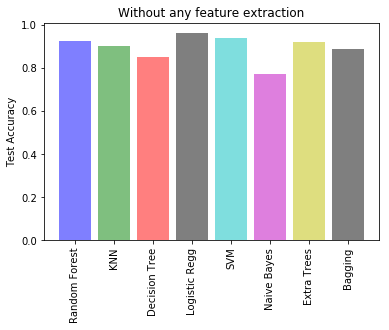

In [9]:
plt.bar(model_names,list_values, align='center', alpha=0.5, color=['b', 'g', 'r', 'k', 'c', 'm', 'y', 'k'])
plt.ylabel('Test Accuracy')
plt.xticks(rotation='vertical')
plt.title('Without any feature extraction')
plt.show()

### 2. Using scaled data (due to correlation between them) 

In [10]:
corr=train.corr().abs()
columns = np.full((corr.shape[0],), True, dtype=bool)

In [11]:
#Initialize a columns numpy array with all values True by Deafault
columns = np.full((corr.shape[0],), True, dtype=bool)
#Iterate Over Whole Correlation Matrix  And Make True for only those columns with correlation less than 0.9
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = train.columns[columns]
scaled_train = train[selected_columns]
scaled_test=test[selected_columns]

In [12]:
list_values=[]
for i in range(len(models)):
    print("Model",(i+1),":::: ",model_names[i])
    predict_accuracy(scaled_test,scaled_train,models[model_names[i]])
print(list_values)

Model 1 ::::  Random Forest
Accuracy on training of model is : 1.0
Accuracy on test set of model is : 0.9345096708517137
Model 2 ::::  KNN
Accuracy on training of model is : 0.9745647442872688
Accuracy on test set of model is : 0.8561248727519511
Model 3 ::::  Decision Tree
Accuracy on training of model is : 1.0
Accuracy on test set of model is : 0.8282999660671869
Model 4 ::::  Logistic Regg


C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy on training of model is : 0.9816376496191512
Accuracy on test set of model is : 0.9433322022395657
Model 5 ::::  SVM
Accuracy on training of model is : 0.9600108813928183
Accuracy on test set of model is : 0.9365456396335257
Model 6 ::::  Naive Bayes
Accuracy on training of model is : 0.8245375408052231
Accuracy on test set of model is : 0.8174414658975229
Model 7 ::::  Extra Trees
Accuracy on training of model is : 1.0
Accuracy on test set of model is : 0.8815744825246012
Model 8 ::::  Bagging
Accuracy on training of model is : 0.9985038084874864
Accuracy on test set of model is : 0.8758059043094673
[0.9345096708517137, 0.8561248727519511, 0.8282999660671869, 0.9433322022395657, 0.9365456396335257, 0.8174414658975229, 0.8815744825246012, 0.8758059043094673]


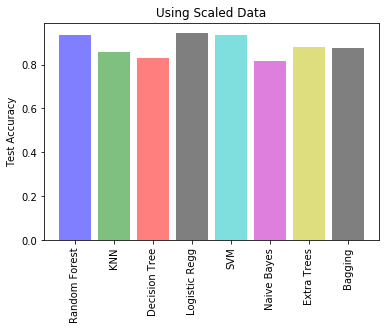

In [13]:
plt.bar(model_names,list_values, align='center', alpha=0.5, color=['b', 'g', 'r', 'k', 'c', 'm', 'y', 'k'])
plt.ylabel('Test Accuracy')
plt.xticks(rotation='vertical')
plt.title('Using Scaled Data')
plt.show()

#### Using Standarisation of data

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
# Fit on training set only.
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
#Apply Standarisation on both the test and train features
Xtrain_std = scaler.transform(X_train)
Xtest_std = scaler.transform(X_test)

In [17]:
list_values=[]
for i in range(len(models)):
    print("Model",(i+1),":::: ",model_names[i])
    predict_array_accuracy_(Xtrain_std,Y_train,Xtest_std,Y_test,models[model_names[i]])
print(list_values)

Model 1 ::::  Random Forest
Accuracy on training of model is : 1.0
Accuracy on test set of model is : 0.9270444519850696
Model 2 ::::  KNN
Accuracy on training of model is : 0.9827257889009793
Accuracy on test set of model is : 0.8775025449609772
Model 3 ::::  Decision Tree
Accuracy on training of model is : 1.0
Accuracy on test set of model is : 0.8598574821852731
Model 4 ::::  Logistic Regg


C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy on training of model is : 0.9945593035908596
Accuracy on test set of model is : 0.9613165931455717
Model 5 ::::  SVM
Accuracy on training of model is : 0.9866702937976061
Accuracy on test set of model is : 0.9521547336274178
Model 6 ::::  Naive Bayes
Accuracy on training of model is : 0.7461915125136017
Accuracy on test set of model is : 0.7702748557855447
Model 7 ::::  Extra Trees
Accuracy on training of model is : 1.0
Accuracy on test set of model is : 0.9100780454699695
Model 8 ::::  Bagging
Accuracy on training of model is : 0.9982317736670294
Accuracy on test set of model is : 0.8887003732609433
[0.9270444519850696, 0.8775025449609772, 0.8598574821852731, 0.9613165931455717, 0.9521547336274178, 0.7702748557855447, 0.9100780454699695, 0.8887003732609433]


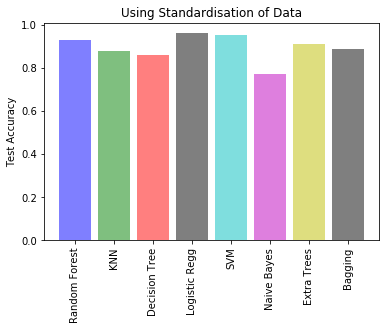

In [18]:
plt.bar(model_names,list_values, align='center', alpha=0.5, color=['b', 'g', 'r', 'k', 'c', 'm', 'y', 'k'])
plt.ylabel('Test Accuracy')
plt.xticks(rotation='vertical')
plt.title('Using Standardisation of Data')
plt.show()

##### Applying PCA to the features

In [19]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [20]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
Xtrain_std_pca = pca.transform(Xtrain_std)
Xtest_std_pca = pca.transform(Xtest_std)

In [22]:
list_values=[]
for i in range(len(models)):
    print("Model",(i+1),":::: ",model_names[i])
    predict_array_accuracy_(Xtrain_std_pca,Y_train,Xtest_std_pca,Y_test,models[model_names[i]])
print(list_values)

Model 1 ::::  Random Forest
Accuracy on training of model is : 1.0
Accuracy on test set of model is : 0.9032914828639295
Model 2 ::::  KNN
Accuracy on training of model is : 0.9801414581066377
Accuracy on test set of model is : 0.8758059043094673
Model 3 ::::  Decision Tree
Accuracy on training of model is : 1.0
Accuracy on test set of model is : 0.8154054971157109
Model 4 ::::  Logistic Regg


C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy on training of model is : 0.9747007616974973
Accuracy on test set of model is : 0.9446895147607737
Model 5 ::::  SVM
Accuracy on training of model is : 0.9978237214363439
Accuracy on test set of model is : 0.9097387173396675
Model 6 ::::  Naive Bayes
Accuracy on training of model is : 0.8299782372143635
Accuracy on test set of model is : 0.8167628096369189
Model 7 ::::  Extra Trees
Accuracy on training of model is : 1.0
Accuracy on test set of model is : 0.832711231761113
Model 8 ::::  Bagging
Accuracy on training of model is : 0.9968715995647442
Accuracy on test set of model is : 0.8466236851034951
[0.9032914828639295, 0.8758059043094673, 0.8154054971157109, 0.9446895147607737, 0.9097387173396675, 0.8167628096369189, 0.832711231761113, 0.8466236851034951]


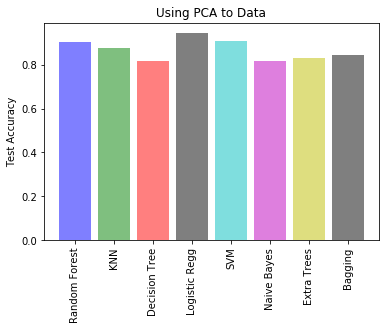

In [23]:
plt.bar(model_names,list_values, align='center', alpha=0.5, color=['b', 'g', 'r', 'k', 'c', 'm', 'y', 'k'])
plt.ylabel('Test Accuracy')
plt.xticks(rotation='vertical')
plt.title('Using PCA to Data')
plt.show()

### Feature Importance
Feature importance gives  a score for each feature of the data, the higher the score more important or relevant is the feature towards your output variable.(Specifically by Use of ExtraTrees Classifier)

In [24]:
clf7.fit(X_train,Y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

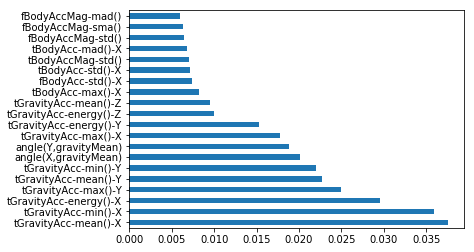

In [98]:
feat_importances = pd.Series(clf7.feature_importances_, index=train.iloc[:,:-2].columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Regularisation of the Data
Using L1 Regularisation (Lasso)

In [25]:
from sklearn.linear_model import Lasso

In [26]:
lasso=Lasso(alpha=0.001,max_iter=10000)
lasso.fit(X_train,Y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
#Lasso score on Training Data
print("Training Score : :",lasso.score(X_train,Y_train))
#Lasso score on Test Data
print("Testing Score : :",lasso.score(X_test,Y_test))

Training Score : : 0.963731382631067
Testing Score : : 0.9509817464915875


In [28]:
from sklearn.feature_selection import SelectFromModel

In [29]:
sel=SelectFromModel(LogisticRegression(C=1,penalty='l1',solver='liblinear'))
sel.fit(X_train,Y_train)

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [30]:
sel.get_support() #True For Selected Feature , False for less relevant Not Selected features

array([ True, False, False,  True,  True, False, False,  True, False,
        True,  True, False,  True, False, False,  True,  True, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True, False, False, False, False,
       False, False,

>The output labels are generated indexwise .So True is For the Features that lasso thought as important and False is for features whose weights are shrinked to zero .(Not Important).

In [31]:
train.iloc[:,:-2].columns[[1,2]]
selected_feat=train.iloc[:,:-2].columns[(sel.get_support())]

In [32]:
print("Total Features: {}".format(X_train.shape[1]))
print("Selected Features :{}".format(len(selected_feat)))

Total Features: 561
Selected Features :375


In [33]:
# Applying model using Selected Features
X_train_sel=sel.transform(X_train)
X_test_sel=sel.transform(X_test)

In [34]:
list_values=[]
for i in range(len(models)):
    print("Model",(i+1),":::: ",model_names[i])
    predict_array_accuracy_(X_train_sel,Y_train,X_test_sel,Y_test,models[model_names[i]])
print(list_values)

Model 1 ::::  Random Forest
Accuracy on training of model is : 1.0
Accuracy on test set of model is : 0.9229725144214456
Model 2 ::::  KNN
Accuracy on training of model is : 0.9823177366702938
Accuracy on test set of model is : 0.9029521547336274
Model 3 ::::  Decision Tree
Accuracy on training of model is : 1.0
Accuracy on test set of model is : 0.841873091279267
Model 4 ::::  Logistic Regg


C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy on training of model is : 0.9907508161044614
Accuracy on test set of model is : 0.9623345775364778
Model 5 ::::  SVM
Accuracy on training of model is : 0.9635473340587595
Accuracy on test set of model is : 0.9457074991516796
Model 6 ::::  Naive Bayes
Accuracy on training of model is : 0.8571817192600653
Accuracy on test set of model is : 0.8595181540549711
Model 7 ::::  Extra Trees
Accuracy on training of model is : 1.0
Accuracy on test set of model is : 0.9080420766881574
Model 8 ::::  Bagging
Accuracy on training of model is : 0.9986398258977149
Accuracy on test set of model is : 0.8907363420427553
[0.9229725144214456, 0.9029521547336274, 0.841873091279267, 0.9623345775364778, 0.9457074991516796, 0.8595181540549711, 0.9080420766881574, 0.8907363420427553]


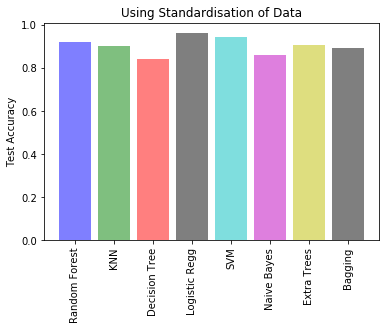

In [35]:
plt.bar(model_names,list_values, align='center', alpha=0.5, color=['b', 'g', 'r', 'k', 'c', 'm', 'y', 'k'])
plt.ylabel('Test Accuracy')
plt.xticks(rotation='vertical')
plt.title('Regularization of Data')
plt.show()

## Plotting Accuracy of Various Models and Techniques Used 

In [ ]:
## To be Done